In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
import numpy as np
import glob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_text=pd.read_pickle('primary_df.pkl')
df_text

,raw_text,sect
source,,
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,SUNRISE MAIDEN
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,TIER 3\n\nSanjaval Vagabond\nMedium explorer\n...
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,SUNRISE MAIDEN MAP KEY\n1. Bridge\na. Pilot’s ...
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,"\nFORTUNE IN THE STARS\n\nTake your station, c..."
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,The Starfinder Adventure Path is designed to p...
...,...,...
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,8
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,"4,800"
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,\nBulldoze (Ex) When a yaruk uses its trample ...


In [3]:
# Apply a first round of text cleaning techniques
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers, remove line breaks.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

round1 = lambda x: clean_text(x)

In [4]:
data_clean=pd.DataFrame(df_text.sect.apply(round1))
data_clean.to_pickle('cleaned_sections.pkl') #saving cleaned version of sections
data_clean

,sect
source,
Dead_Suns_1,sunrise maiden
Dead_Suns_1,tier sanjaval vagabond medium explorer spee...
Dead_Suns_1,sunrise maiden map key bridge a pilot s st...
Dead_Suns_1,fortune in the stars take your station chec...
Dead_Suns_1,the starfinder adventure path is designed to p...
...,...
Dead_Suns_2,
Dead_Suns_2,
Dead_Suns_2,bulldoze ex when a yaruk uses its trample a...


In [5]:
#Tried Lemmatizing and Stemming, Lemmatizing seemed to give generally more understandable tokens

def preprocess_text(text):
    """preprocessing text, tokenizing words that are strings longer than 2 letters
    lemmatising tokens, adding new stopwords to stopwords list and removing all stopwords"""
    from nltk.corpus import stopwords
    #Tokenize words while ignoring punctuation
    #letters only, strings longer than 2 letters
    tokeniser = RegexpTokenizer(r'[A-Za-z]{3,}')
    tokens = tokeniser.tokenize(text)
     # lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token,pos='v') for token in tokens]
    #ps=PorterStemmer()
    #ports=[ps.stem(token.lower())for token in tokens]
    
    # Remove creating and removing stopwords
    stopwords= stopwords.words('english')
    new_stopwords=['statistics','tactics','ecology','bulk','defense','offense','treasure',
                  'mission','pcs','starfinder','starfinders'] 
    stopwords.extend(new_stopwords)
    keywords= [lemma for lemma in lemmas if lemma not in stopwords]
    #keywords= [port for port in ports if port not in stopwords]
    return keywords

In [6]:
#Vectorizing
vectorizer = CountVectorizer(analyzer=preprocess_text)
doc_word = vectorizer.fit_transform(data_clean.sect)
doc_word.shape

(6558, 22160)

In [7]:
#Creating document term matrix, using book source instead of section as index as 
#more concerned with where the section of text originated than the section iteself
dtm=pd.DataFrame(doc_word.toarray(),columns=vectorizer.get_feature_names())
dtm.index=data_clean.index
dtm

,aanung,abadar,abadaran,abadarans,abadarcorp,abaddon,aballon,aballonian,abandon,abandonment,...,zoologists,zoom,zoos,zunar,zurnala,zusleggim,zyakama,zybollo,zygotes,zysyk
source,,,,,,,,,,,,,,,,,,,,,
Dead_Suns_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dead_Suns_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dead_Suns_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NMF Topic Modeling with Countvectorizer

In [8]:
nmf_model = NMF(n_components=20,random_state=1)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

/home/jillian/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/jillian/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(6558, 20)

In [9]:
topic_word = nmf_model.components_
topic_word.shape

(20, 22160)

In [10]:
#Looking at the words that make up each topic
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-21:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['area',
  'room',
  'door',
  'wall',
  'open',
  'contain',
  'two',
  'doors',
  'light',
  'engineer',
  'floor',
  'one',
  'lock',
  'chamber',
  'check',
  'use',
  'computer',
  'lead',
  'succeed',
  'see'],
 ['worlds',
  'pact',
  'planet',
  'world',
  'within',
  'species',
  'live',
  'many',
  'one',
  'even',
  'system',
  'new',
  'find',
  'make',
  'star',
  'drift',
  'though',
  'space',
  'first',
  'form'],
 ['creature',
  'save',
  'effect',
  'level',
  'spell',
  'target',
  'use',
  'throw',
  'action',
  'round',
  'creatures',
  'feet',
  'time',
  'ability',
  'affect',
  'within',
  'one',
  'take',
  'mind',
  'point'],
 ['ship',
  'starship',
  'crew',
  'pilot',
  'drift',
  'vessel',
  'rank',
  'captain',
  'engineer',
  'officer',
  'combat',
  'space',
  'computers',
  'bay',
  'sensors',
  'systems',
  'cargo',
  'science',
  'gunnery',
  'rock'],
 ['check',
  'succeed',
  'successful',
  'attempt',
  'one',
  'take',
  'perception',
  'engineer',

In [11]:
data_clean1=data_clean.copy()
data_clean1['topic']=doc_topic.argmax(axis=1)

In [12]:
#Adding topic to dataframe
data_clean1.to_pickle('topics.pkl')
data_clean1.to_csv('topics.csv')
data_clean1

,sect,topic
source,,
Dead_Suns_1,sunrise maiden,3
Dead_Suns_1,tier sanjaval vagabond medium explorer spee...,3
Dead_Suns_1,sunrise maiden map key bridge a pilot s st...,13
Dead_Suns_1,fortune in the stars take your station chec...,1
Dead_Suns_1,the starfinder adventure path is designed to p...,1
...,...,...
Dead_Suns_2,,0
Dead_Suns_2,,0
Dead_Suns_2,bulldoze ex when a yaruk uses its trample a...,17


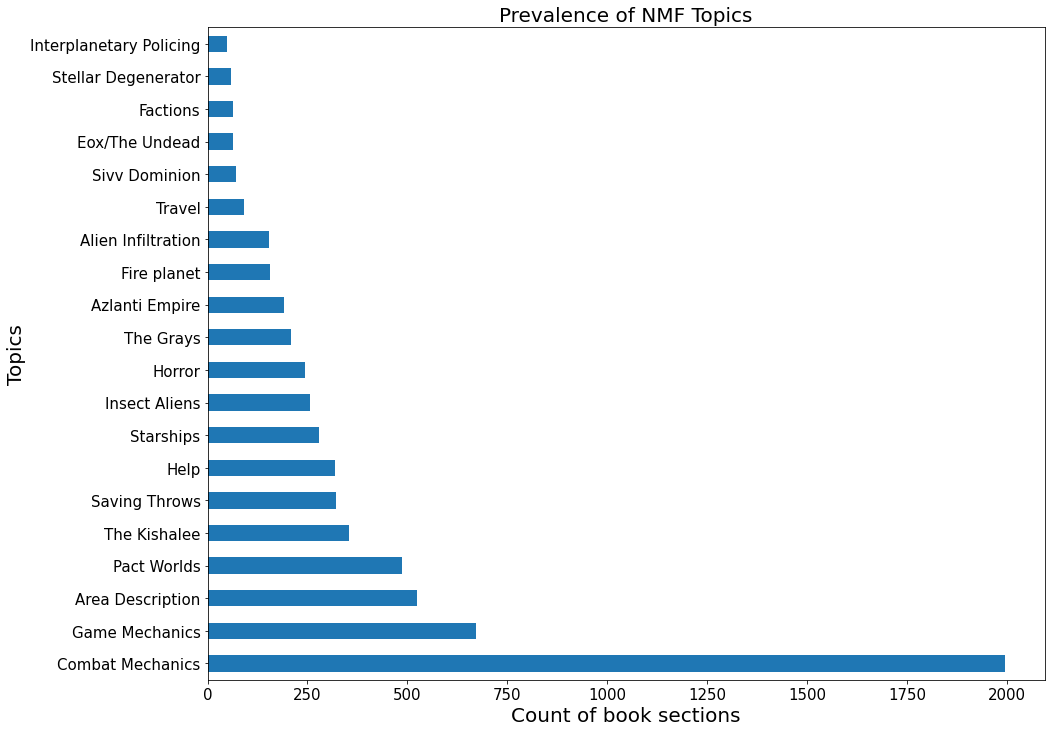

In [13]:
#Examining at how often topics occur, counts are number of sections
import matplotlib.pyplot as plt
doc_cluster=doc_topic.argmax(axis=1)
pd.Series(doc_cluster).value_counts().plot.barh(figsize=(15,12),rot=0)
y=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
labels=['Combat Mechanics','Game Mechanics','Area Description','Pact Worlds',
       'The Kishalee','Saving Throws','Help','Starships','Insect Aliens',
       'Horror','The Grays','Azlanti Empire','Fire planet','Alien Infiltration',
       'Travel','Sivv Dominion','Eox/The Undead','Factions','Stellar Degenerator',
       'Interplanetary Policing']
plt.ylabel('Topics', fontsize=20)
plt.xlabel('Count of book sections', fontsize=20)
plt.yticks(y,labels, fontsize=15)
plt.xticks(fontsize=15)
plt.title('Prevalence of NMF Topics', fontsize=20);

<ipython-input-30-d084f56b1f5f>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


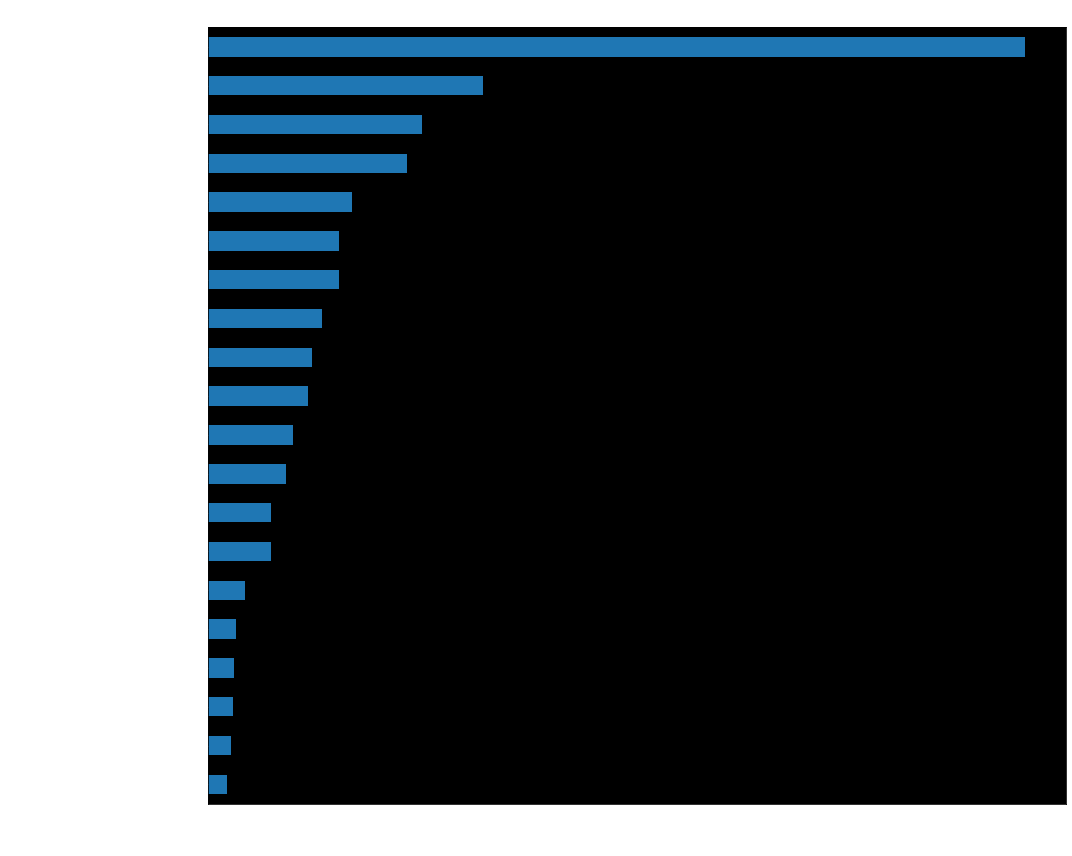

In [30]:
#Editing for presentation
pd.Series(doc_cluster).value_counts(ascending=True).plot.barh(figsize=(15,12),rot=0)
y=[19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
labels=['Combat Mechanics','Game Mechanics','Area Description','Pact Worlds',
       'The Kishalee','Saving Throws','Help','Starships','Insect Aliens',
       'Horror','The Grays','Azlanti Empire','Fire planet','Alien Infiltration',
       'Travel','Sivv Dominion','Eox/The Undead','Factions','Stellar Degenerator',
       'Interplanetary Policing']
plt.ylabel('Topics', fontsize=20).set_color('white')
plt.xlabel('Count of book sections', fontsize=20).set_color('white')
plt.yticks(y,labels, fontsize=15)
plt.xticks(fontsize=15)
plt.tick_params(colors='white')
plt.title('Prevalence of NMF Topics', fontsize=20).set_color('white')
ax=plt.axes()
ax.set_facecolor('black')
plt.tight_layout()
plt.savefig('topics_graph.svg',format='svg');

In [15]:
#saving topic keywords for future reference
topic_keys=pd.Series(topic_words)
topic_keys=topic_keys.to_frame()
topic_keys.rename(columns={0:'Keywords'},inplace=True)
topic_names=['Area Description','Pact Worlds','Game Mechanics','Starships',
            'Saving Throws','Insect Aliens','Eox/The Undead','Azlanti Empire','Fire Planet',
            'Help','Travel','Horror','Sivv Dominion','Factions','Stellar Degenerator',
            'Interplanetary Policing','Alien Infiltration','Combat Mechanics','The Grays',
            'The Kishalee']
topic_keys['Topic Names']=topic_names
topic_keys.set_index('Topic Names', inplace=True)
topic_keys.to_csv('topic_keywords.csv')
topic_keys

,Keywords
Topic Names,
Area Description,"[area, room, door, wall, open, contain, two, d..."
Pact Worlds,"[worlds, pact, planet, world, within, species,..."
Game Mechanics,"[creature, save, effect, level, spell, target,..."
Starships,"[ship, starship, crew, pilot, drift, vessel, r..."
Saving Throws,"[check, succeed, successful, attempt, one, tak..."
Insect Aliens,"[swarm, hylax, components, suskillon, mind, sh..."
Eox/The Undead,"[fleet, corpse, eox, waneda, report, ministry,..."
Azlanti Empire,"[azlanti, empire, star, aeon, guard, drive, ru..."
Fire Planet,"[sun, diver, burn, archipelago, take, fire, kh..."


In [16]:
topic_keys.Keywords.iloc[5]

['swarm',
 'hylax',
 'components',
 'suskillon',
 'mind',
 'shirrens',
 'sdf',
 'creatures',
 'take',
 'hive',
 'units',
 'temple',
 'commit',
 'soldier',
 'use',
 'shirren',
 'force',
 'god',
 'brinnoa',
 'host']

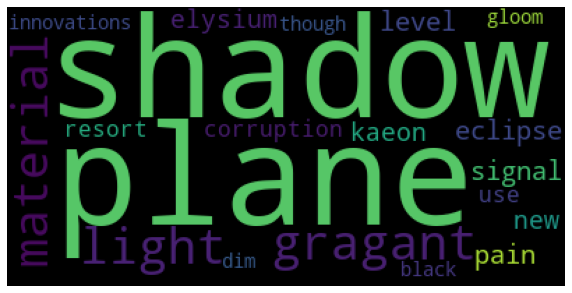

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from PIL import Image
import numpy as np
topic_text=' '.join([str(elem)for elem in topic_keys.Keywords.iloc[11]])
wc=WordCloud(max_font_size=100,random_state=42).generate(topic_text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('horror_topic_wc.svg',format='svg')
plt.show()

# Trying LDA

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
lda_model = LatentDirichletAllocation(n_components=20)
lda_doc_topic = lda_model.fit_transform(doc_word)
lda_doc_topic.shape

(6558, 20)

In [20]:
words = vectorizer.get_feature_names()
ldat = lda_model.components_.argsort(axis=1)[:,-1:-7:-1]
lda_topic_words = [[words[e] for e in l] for l in ldat]
lda_topic_words

[['swarm', 'hylax', 'suskillon', 'shirrens', 'shirren', 'components'],
 ['sun', 'worlds', 'city', 'pact', 'burn', 'fleet'],
 ['organization', 'environment', 'plane', 'solitary', 'species', 'even'],
 ['shadow', 'plane', 'gragant', 'eclipse', 'check', 'ooze'],
 ['sivv', 'station', 'check', 'drift', 'ship', 'computer'],
 ['check', 'area', 'security', 'one', 'see', 'take'],
 ['check', 'room', 'area', 'succeed', 'wall', 'door'],
 ['combat', 'fight', 'morale', 'attack', 'use', 'check'],
 ['ship', 'starship', 'level', 'pilot', 'vessel', 'drone'],
 ['kac', 'eac', 'fort', 'perception', 'ref', 'sense'],
 ['noma', 'city', 'build', 'like', 'use', 'core'],
 ['skills', 'con', 'int', 'dex', 'wis', 'cha'],
 ['attack', 'forward', 'bay', 'drift', 'light', 'port'],
 ['azlanti', 'cadets', 'area', 'guard', 'ship', 'aeon'],
 ['damage', 'creature', 'effect', 'target', 'use', 'save'],
 ['gray', 'pact', 'stewards', 'reptoid', 'station', 'know'],
 ['rank', 'captain', 'pilot', 'crew', 'officer', 'ship'],
 ['see'

# NMF with TFID

In [21]:
vect= TfidfVectorizer(analyzer=preprocess_text)
tf_doc_word = vect.fit_transform(data_clean.sect)
tf_doc_word.shape

(6558, 22160)

In [22]:
tf_dtm=pd.DataFrame(tf_doc_word.toarray(),columns=vect.get_feature_names())
tf_dtm.index=df_text.index
tf_dtm

,aanung,abadar,abadaran,abadarans,abadarcorp,abaddon,aballon,aballonian,abandon,abandonment,...,zoologists,zoom,zoos,zunar,zurnala,zusleggim,zyakama,zybollo,zygotes,zysyk
source,,,,,,,,,,,,,,,,,,,,,
Dead_Suns_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dead_Suns_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dead_Suns_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
tf_nmf_model = NMF(n_components=20,random_state=2)
tf_doc_topic = tf_nmf_model.fit_transform(tf_doc_word)
tf_doc_topic.shape

/home/jillian/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(6558, 20)

In [24]:
tf_topic_word = tf_nmf_model.components_
tf_topic_word.shape

(20, 22160)

In [25]:
tf_words = vect.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-10:-1]
tf_topic_words = [[words[e] for e in l] for l in t]
tf_topic_words

[['area', 'room', 'door', 'wall', 'open', 'contain', 'two', 'doors', 'light'],
 ['worlds',
  'pact',
  'planet',
  'world',
  'within',
  'species',
  'live',
  'many',
  'one'],
 ['creature',
  'save',
  'effect',
  'level',
  'spell',
  'target',
  'use',
  'throw',
  'action'],
 ['ship',
  'starship',
  'crew',
  'pilot',
  'drift',
  'vessel',
  'rank',
  'captain',
  'engineer'],
 ['check',
  'succeed',
  'successful',
  'attempt',
  'one',
  'take',
  'perception',
  'engineer',
  'bonus'],
 ['swarm',
  'hylax',
  'components',
  'suskillon',
  'mind',
  'shirrens',
  'sdf',
  'creatures',
  'take'],
 ['fleet',
  'corpse',
  'eox',
  'waneda',
  'report',
  'ministry',
  'bone',
  'eoxian',
  'undead'],
 ['azlanti',
  'empire',
  'star',
  'aeon',
  'guard',
  'drive',
  'rune',
  'madelon',
  'zolan'],
 ['sun',
  'diver',
  'burn',
  'archipelago',
  'take',
  'fire',
  'khaim',
  'force',
  'bubble'],
 ['know', 'see', 'get', 'one', 'ask', 'might', 'like', 'take', 'say'],
 ['sec

In [26]:
#Looking at how often a topic appears
tf_doc_cluster=tf_doc_topic.argmax(axis=1)
pd.Series(tf_doc_cluster).value_counts()

2     1681
13     801
0      489
16     465
1      437
19     311
12     292
15     269
5      264
3      232
17     186
4      175
6      159
7      157
11     130
18     121
10     107
8      105
14      94
9       83
dtype: int64

In [27]:
data_clean2=data_clean.copy()
data_clean2['topic']=tf_doc_topic.argmax(axis=1)

In [28]:
#Topics don't seem to line up as well as they do with countvectorizer nmf
data_clean2

,sect,topic
source,,
Dead_Suns_1,sunrise maiden,2
Dead_Suns_1,tier sanjaval vagabond medium explorer spee...,11
Dead_Suns_1,sunrise maiden map key bridge a pilot s st...,9
Dead_Suns_1,fortune in the stars take your station chec...,2
Dead_Suns_1,the starfinder adventure path is designed to p...,8
...,...,...
Dead_Suns_2,,0
Dead_Suns_2,,0
Dead_Suns_2,bulldoze ex when a yaruk uses its trample a...,13
